<a href="https://colab.research.google.com/github/yashaswi2000/Text_summarisation/blob/master/Ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import os

In [0]:
 ! pip install -q kaggle

In [4]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"makulayashaswi","key":"bb915eb90d35cc5dddc88c940585192e"}'}

In [0]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [0]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d pariza/bbc-news-summary

 56% 5.00M/8.91M [00:00<00:00, 12.8MB/s]
100% 8.91M/8.91M [00:00<00:00, 20.1MB/s]


In [8]:
!unzip bbc-news-summary.zip

Streaming output truncated to the last 5000 lines.
  inflating: BBC News Summary/Summaries/sport/364.txt  
  inflating: BBC News Summary/Summaries/sport/365.txt  
  inflating: BBC News Summary/Summaries/sport/366.txt  
  inflating: BBC News Summary/Summaries/sport/367.txt  
  inflating: BBC News Summary/Summaries/sport/368.txt  
  inflating: BBC News Summary/Summaries/sport/369.txt  
  inflating: BBC News Summary/Summaries/sport/370.txt  
  inflating: BBC News Summary/Summaries/sport/371.txt  
  inflating: BBC News Summary/Summaries/sport/372.txt  
  inflating: BBC News Summary/Summaries/sport/373.txt  
  inflating: BBC News Summary/Summaries/sport/374.txt  
  inflating: BBC News Summary/Summaries/sport/375.txt  
  inflating: BBC News Summary/Summaries/sport/376.txt  
  inflating: BBC News Summary/Summaries/sport/377.txt  
  inflating: BBC News Summary/Summaries/sport/378.txt  
  inflating: BBC News Summary/Summaries/sport/379.txt  
  inflating: BBC News Summary/Summaries/sport/380.txt

In [9]:
data_path = "./BBC News Summary"
folders = os.listdir(data_path)
article_path = os.path.join(data_path,folders[0])
summary_path = os.path.join(data_path,folders[1])
categories = os.listdir(article_path)
article_list = []
summary_list = []
for i in categories:
  article_files = os.listdir(article_path + '/' + i)
  summary_files = os.listdir(summary_path + '/' + i)
  for j in range(len(article_files)):
    file_path_1 = article_path + '/' + i + '/' + article_files[j]
    file_path_2 = summary_path + '/' + i + '/' + summary_files[j]
    #print(file_path_1)
    try:
        
        f = open(file_path_1)
        article_list.append(' '.join(f.read().splitlines()))
        f = open(file_path_2)
        summary_list.append(' '.join(f.read().splitlines()))
        
    except:
        print("error") 
d = {'article':article_list,'summary':summary_list}
df = pd.DataFrame(d)
df

error


,article,summary
0,Brown comes out shooting Labour may have abol...,Labour may have abolished hunting - but that d...
1,Blair rejects Iraq advice calls Tony Blair ha...,"Mr Blair said the statement was a ""fair summar..."
2,Tory expert denies defeat warning The Conserv...,Mr Howard appointed Mr Crosby as his elections...
3,Brown targets OAPs and homebuyers Gordon Brow...,Mr Kennedy criticised Mr Brown for failing to ...
4,Economy focus for election battle Britain's e...,Party election supremo Alan Milburn said the a...
...,...,...
2219,Progress on new internet domains By early 200...,By early 2005 the net could have two new domai...
2220,Microsoft releases patches Microsoft has warn...,Microsoft has warned PC users to update their ...
2221,Half of UK's mobiles 'go online' Multimedia m...,About 53 million people own a mobile in the UK...
2222,Parents face video game lessons Ways of ensur...,Ways of ensuring that parents know which video...


In [0]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}


In [11]:
df['article'][:10]

0    Brown comes out shooting  Labour may have abol...
1    Blair rejects Iraq advice calls  Tony Blair ha...
2    Tory expert denies defeat warning  The Conserv...
3    Brown targets OAPs and homebuyers  Gordon Brow...
4    Economy focus for election battle  Britain's e...
5    Kennedy to make temple address  Charles Kenned...
6    Teens 'know little' of politics  Teenagers que...
7    Nat Insurance to rise, say Tories  National In...
8    Blair hails Turkey-EU talks deal  Tony Blair h...
9    Brown outlines third term vision  Gordon Brown...
Name: article, dtype: object

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
import re           
from bs4 import BeautifulSoup 
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords   
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [14]:
stop_words = set(stopwords.words('english')) 
def text_cleaner(text):
    newString = text.lower()
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    tokens = [w for w in newString.split() if not w in stop_words]
    long_words=[]
    for i in tokens:
        if len(i)>=3:                  
            long_words.append(i)   
    return (" ".join(long_words)).strip()

cleaned_text = []
for t in df['article']:
    cleaned_text.append(text_cleaner(t))

cleaned_text[0]

'brown comes shooting labour may abolished hunting stop chancellor gordon brown using budget fire barrels opposition parties core election foxes specifically saw attempting slaughter council tax election issue tear limb limb wider policies pensioners families relatively short speech kept best last clearly give exactly pre election boost everyone predicting couple children pensioner patient youngster something pulled brown red box attempt persuade stick switch new labour government like surgeon attempted target handouts absolute precision onto exactly groups government needs appeal election campaign announcements brought great cheers mps full election mode looking man give ammunition doorsteps obviously believed done coincidentally given image prime minister waiting another little boost labour mps example undoubtedly engage debate exactly redistributive lovely old labour word chancellor really gordon brown never going put show even cast man win labour historic third term demeanour remai

In [15]:
def summary_cleaner(text):
    newString = re.sub('"','', text)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString)
    newString = newString.lower()
    tokens=newString.split()
    newString=''
    for i in tokens:
        if len(i)>1:                                 
            newString=newString+i+' '  
    return newString

#Call the above function
cleaned_summary = []
for t in df['summary']:
    cleaned_summary.append(summary_cleaner(t))

cleaned_summary[0]

'labour may have abolished hunting but that did not stop chancellor gordon brown using his budget to fire both barrels at some of the opposition parties core election foxes and in labour circles there will undoubtedly be an argument over just how good prime minister gordon brown will make at some point after the next election he did it most obviously with his increase in national insurance contributions after the election campaign during which he had pledged not to increase income tax as always they accused him of glossing over the facts of the black hole at the centre of his finances which they claim would ensure tax increases after the election labour mps for example will undoubtedly now engage in debate over exactly how redistributive lovely old labour word this chancellor really is so if you are couple with children pensioner patient or youngster there was something pulled from mr brown red box in an attempt to persuade you to stick with or switch to new labour government tory lead

In [0]:
df['cleaned_article']=cleaned_text
df['cleaned_summary']=cleaned_summary

In [0]:
df['cleaned_summary'] = df['cleaned_summary'].apply(lambda x : '_START_ '+ x + ' _END_')

In [18]:
for i in range(5):
    print("article:",df['cleaned_article'][i])
    print("Summary:",df['cleaned_summary'][i])
    print("\n")

article: brown comes shooting labour may abolished hunting stop chancellor gordon brown using budget fire barrels opposition parties core election foxes specifically saw attempting slaughter council tax election issue tear limb limb wider policies pensioners families relatively short speech kept best last clearly give exactly pre election boost everyone predicting couple children pensioner patient youngster something pulled brown red box attempt persuade stick switch new labour government like surgeon attempted target handouts absolute precision onto exactly groups government needs appeal election campaign announcements brought great cheers mps full election mode looking man give ammunition doorsteps obviously believed done coincidentally given image prime minister waiting another little boost labour mps example undoubtedly engage debate exactly redistributive lovely old labour word chancellor really gordon brown never going put show even cast man win labour historic third term demeano

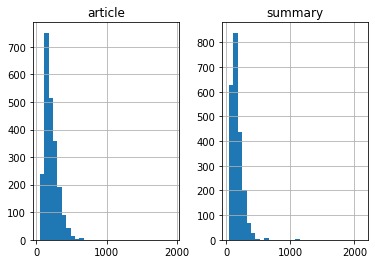

In [19]:
import matplotlib.pyplot as plt
article_word_count = []
summary_word_count = []

for i in df['cleaned_article']:
      article_word_count.append(len(i.split()))

for i in df['cleaned_summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'article':article_word_count, 'summary':summary_word_count})
length_df.hist(bins = 30)
plt.show()

In [20]:
import statistics
statistics.mode(article_word_count)


128

In [21]:

statistics.mode(summary_word_count)

90

In [0]:
max_len_article= 128
max_len_summary= 128

In [23]:
df['cleaned_article'][:10]

0    brown comes shooting labour may abolished hunting stop chancellor gordon brown using budget fire barrels opposition parties core election foxes specifically saw attempting slaughter council tax el...
1    blair rejects iraq advice calls tony blair rejected calls publication advice legality iraq war amid growing calls investigation prime minister told monthly press conference matter dealt attorney g...
2    tory expert denies defeat warning conservatives campaign director denied report claiming warned michael howard party could win next general election times monday said australian lynton crosby told...
3    brown targets oaps homebuyers gordon brown doubled level house buyers pay stamp duty put economy heart labour election campaign chancellor also unveiled one council tax refund pensioners rise chil...
4    economy focus election battle britain economic future heart labour poll campaign chancellor gordon brown said speaking cabinet members held last meeting expected election anno

In [24]:
from sklearn.model_selection import train_test_split
X_list = df['cleaned_article']
Y_list = df['cleaned_summary']
Y_list
x_tr,x_val,y_tr,y_val=train_test_split(X_list,Y_list,test_size=0.2,random_state=0,shuffle=True) 
x_tr

841     wembley firm make profit shares multiplex group building new wembley stadium fell much said would make money project australian firm said would break even australian dollars rebuild rise costs wor...
1747    veteran martinez wins thai title conchita martinez first title almost five years victory anna lena groenefeld volvo women open pattaya thailand year old spaniard came first title since berlin feel...
2117    gamer buys virtual land year old gamer spent island exists computer role playing game australian gamer known gaming moniker deathifier bought island online auction land exists within game project ...
1174    bening makes awards breakthrough film actress annette bening oscar starring role award winning film julia bening born texas gained prominence string key roles although oscar far eluded status one ...
1502    chepkemei joins edinburgh line susan chepkemei decided fit enough run next month great edinburgh international cross country kenyan initially unsure would recov

In [0]:
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr,  maxlen=max_len_article, padding='post') 
x_val   =   pad_sequences(x_val, maxlen=max_len_article, padding='post')

x_voc_size   =  len(x_tokenizer.word_index) +1

In [0]:
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_tr))

#convert summary sequences into integer sequences
y_tr    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr, maxlen=max_len_summary, padding='post')
y_val   =   pad_sequences(y_val, maxlen=max_len_summary, padding='post')

y_voc_size  =   len(y_tokenizer.word_index) +1

In [27]:
x_voc_size

24845

In [28]:
y_voc_size

17258

In [0]:
import tensorflow as tf
import os
from tensorflow.python.keras.layers import Layer
from tensorflow.python.keras import backend as K


class AttentionLayer(Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs, verbose=False):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state """

            assert_msg = "States must be a list. However states {} is of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            """ Some parameters required for shaping tensors"""
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch_size*en_seq_len, latent_dim
            reshaped_enc_outputs = K.reshape(encoder_out_seq, (-1, en_hidden))
            # <= batch_size*en_seq_len, latent_dim
            W_a_dot_s = K.reshape(K.dot(reshaped_enc_outputs, self.W_a), (-1, en_seq_len, en_hidden))
            if verbose:
                print('wa.s>',W_a_dot_s.shape)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim
            if verbose:
                print('Ua.h>',U_a_dot_h.shape)

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            reshaped_Ws_plus_Uh = K.tanh(K.reshape(W_a_dot_s + U_a_dot_h, (-1, en_hidden)))
            if verbose:
                print('Ws+Uh>', reshaped_Ws_plus_Uh.shape)

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.reshape(K.dot(reshaped_Ws_plus_Uh, self.V_a), (-1, en_seq_len))
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            if verbose:
                print('ei>', e_i.shape)

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """
            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return c_i, [c_i]

        def create_inital_state(inputs, hidden_size):
            # We are not using initial states, but need to pass something to K.rnn funciton
            fake_state = K.zeros_like(inputs)  # <= (batch_size, enc_seq_len, latent_dim
            fake_state = K.sum(fake_state, axis=[1, 2])  # <= (batch_size)
            fake_state = K.expand_dims(fake_state)  # <= (batch_size, 1)
            fake_state = K.tile(fake_state, [1, hidden_size])  # <= (batch_size, latent_dim
            return fake_state

        fake_state_c = create_inital_state(encoder_out_seq, encoder_out_seq.shape[-1])
        fake_state_e = create_inital_state(encoder_out_seq, encoder_out_seq.shape[1])  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]


In [55]:
import tensorflow as tf
from keras import backend as K 
K.clear_session() 
latent_dim = 500 
#from attention_keras.layers.attention import AttentionLayer

# Encoder 
encoder_inputs = Input(shape=(max_len_article,)) 
enc_emb = Embedding(x_voc_size, latent_dim,trainable=True)(encoder_inputs) 

#LSTM 1 
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb) 

#LSTM 2 
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1) 

#LSTM 3 
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True) 
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2) 

# Set up the decoder. 
decoder_inputs = Input(shape=(None,)) 
dec_emb_layer = Embedding(y_voc_size, latent_dim,trainable=True) 
dec_emb = dec_emb_layer(decoder_inputs) 

#LSTM using encoder_states as initial state
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True) 
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c]) 

#Attention Layer
#attn_layer = AttentionLayer(name='attention_layer') 
#attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])
attn_out = tf.keras.layers.Attention()(
    [encoder_outputs, decoder_outputs]) 

# Concat attention output and decoder LSTM output 
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#Dense layer
decoder_dense = TimeDistributed(Dense(y_voc_size, activation='softmax')) 
decoder_outputs = decoder_dense(decoder_concat_input) 

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs) 
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 128, 500)     12422500    input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 128, 500), ( 2002000     embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

In [0]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [0]:
es = EarlyStopping(monitor='loss', mode='min', verbose=1)

In [58]:
history=model.fit([x_tr,y_tr], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1) ,verbose=1, epochs=10,callbacks=[es],batch_size=200,validation_data=([x_val,y_val], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)))

Epoch 1/10
9/9 [==============================] - 9s 975ms/step - loss: 8.1205 - val_loss: 6.6722
Epoch 2/10
9/9 [==============================] - 8s 855ms/step - loss: 6.8191 - val_loss: 6.6290
Epoch 3/10
9/9 [==============================] - 8s 859ms/step - loss: 6.7038 - val_loss: 6.4181
Epoch 4/10
9/9 [==============================] - 8s 858ms/step - loss: 6.5393 - val_loss: 6.2894
Epoch 5/10
9/9 [==============================] - 8s 856ms/step - loss: 6.3663 - val_loss: 6.1379
Epoch 6/10
9/9 [==============================] - 8s 860ms/step - loss: 6.1728 - val_loss: 5.8973
Epoch 7/10
9/9 [==============================] - 8s 852ms/step - loss: 5.9097 - val_loss: 5.6213
Epoch 8/10
9/9 [==============================] - 8s 854ms/step - loss: 5.6461 - val_loss: 5.3926
Epoch 9/10
9/9 [==============================] - 8s 857ms/step - loss: 5.3703 - val_loss: 5.1336
Epoch 10/10
9/9 [==============================] - 8s 865ms/step - loss: 5.0904 - val_loss: 4.8787


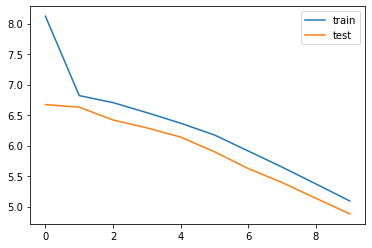

In [75]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend() 
pyplot.show()

In [0]:
reverse_target_word_index=y_tokenizer.index_word 
reverse_source_word_index=x_tokenizer.index_word 
target_word_index=y_tokenizer.word_index

In [0]:
# encoder inference
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# decoder inference
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_len_article,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])
decoder_shape=decoder_outputs2.shape
#attention inference
#attn_layer = tf.keras.layers.Attention()
attn_layer = AttentionLayer(name='attention_layer') 
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final decoder model
decoder_model = Model(
[decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
[decoder_outputs2] + [state_h2, state_c2])

In [0]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Chose the 'start' word as the first word of the target sequence
    target_seq[0, 0] = target_word_index['start']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if(sampled_token!='end'):
            decoded_sentence += ' '+sampled_token

            # Exit condition: either hit max length or find stop word.
            if (sampled_token == 'end' or len(decoded_sentence.split()) >= (max_len_summary-1)):
                stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [0]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
      if((i!=0 and i!=target_word_index['start']) and i!=target_word_index['end']):
        newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
      if(i!=0):
        newString=newString+reverse_source_word_index[i]+' '
    return newString

In [73]:
for i in range(len(x_val)):
  print("Review:",seq2text(x_val[i]))
  print("Original summary:",seq2summary(y_val[i]))
  print("Predicted summary:",decode_sequence(x_val[i].reshape(1,max_len_article)))
  print("\n")

Review: service instead paying taxes prime minister turns chancellor says much got coffers brown says well prime minister bad news houses britain painted actually nobody paid tax observed total disaster could seem think things say lim confided show presenter jonathan year old doctor bolton made good impression even little thrown suggestion instead treated nhs young given good beating left die dominic son late libel lawyer george voted final platform cutting defence spending boost education opinion divided rodney year old convicted fraudster thought smooth talking former solicitor hardline crime immigration deserved chance progress could join rest crooks houses parliament kelly said would trust far could throw series continues throughout week public given chance one prospective every night itv fund election campaign eventual winner publicity could give winner flying start candidates 
Original summary: have been painted but actually nobody has paid any tax observed mr but ms kelly said s

TypeError: ignored